## Basic Operations<br>
#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#### Reading datasets

In [2]:
train_df=pd.read_csv("Boston_Train.csv")
test_df=pd.read_csv("Boston_Test.csv")

#### Concating train and test datasets

In [3]:
data=pd.concat([train_df, test_df], axis=0)
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Dataset details<br>


The Boston Housing Dataset is a derived from information collected by the U.S. 
Census Service concerning housing in the area of Boston MA. The following 
describes the dataset columns:<br><br>
* CRIM - per capita crime rate by town<br>
* ZN - proportion of residential land zoned for lots over 25,000 sq. ft.  INDUS - proportion of non-retail business acres per town. <br>
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 
otherwise)<br>
* NOX - nitric oxides concentration (parts per 10 million)<br>
* RM - average number of rooms per dwelling<br>
* AGE - proportion of owner-occupied units built prior to 1940<br>
* DIS - weighted distances to five Boston employment centers<br>
* RAD - index of accessibility to radial highways<br>
* TAX - full-value property-tax rate per $10,000<br>

* PTRATIO - pupil-teacher ratio by town<br>
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
* LSTAT - % lower status of the population<br>
* MEDV - Median value of owner-occupied homes in $1000'<br>

<br>
<br><br>
<br><br>
<br><br>
<br>
<br>We don't need 1st column (Unnamed:0) since it's a index column that we have already by default. So we should drop it from training and testing data set in order to prevent errors in ML model performance.

In [4]:
data=data.drop(['Unnamed: 0'], axis=1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Finding null values and treating them<br>
Replacing all 0 values by NaN

In [5]:
data.replace(0,np.nan,inplace = True)
data.isnull().sum()

crim         0
zn         372
indus        0
chas       471
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
black        0
lstat        0
medv         0
dtype: int64

Finding missing value percentage

In [6]:
print("Percentage of missing values:")
display(data.isnull().sum()/len(data) * 100)

Percentage of missing values:


crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black       0.000000
lstat       0.000000
medv        0.000000
dtype: float64

From above reuslts we can conclude that we have approxiately 63% missing values in zn feature and 92% in chas feature in train data set. As well as we have approxiately 96% missing values in zn feature and 94% in chas feature in train data set.<br>
So we have to remove those two features since we can not fill this amount of missing values which may increase the error in regresison models.

Dropping two features

In [7]:
data.drop(["zn", "chas"], axis=1, inplace=True)
data.isnull().sum()

crim       0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

#### Finding Outliers

In [8]:
def outlier_detect(DF):
    DF.plot(kind="box", subplots=True, layout=(4,4), figsize=(15,15));

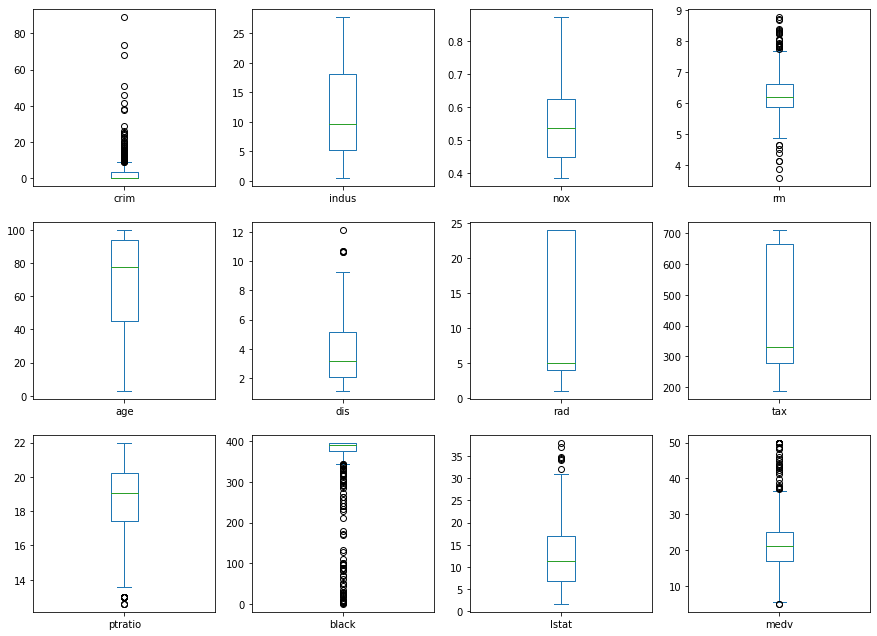

In [9]:
outlier_detect(data)

In [10]:
def outlier_treat(col_name):
    Q3=np.percentile(col_name, 75)
    Q1=np.percentile(col_name, 25)
    IQR=Q3-Q1
    UB=Q3+(1.5*IQR)
    LB=Q1-(1.5*IQR)
    col_name=col_name.apply(lambda x:UB if x>UB else x)
    return col_name

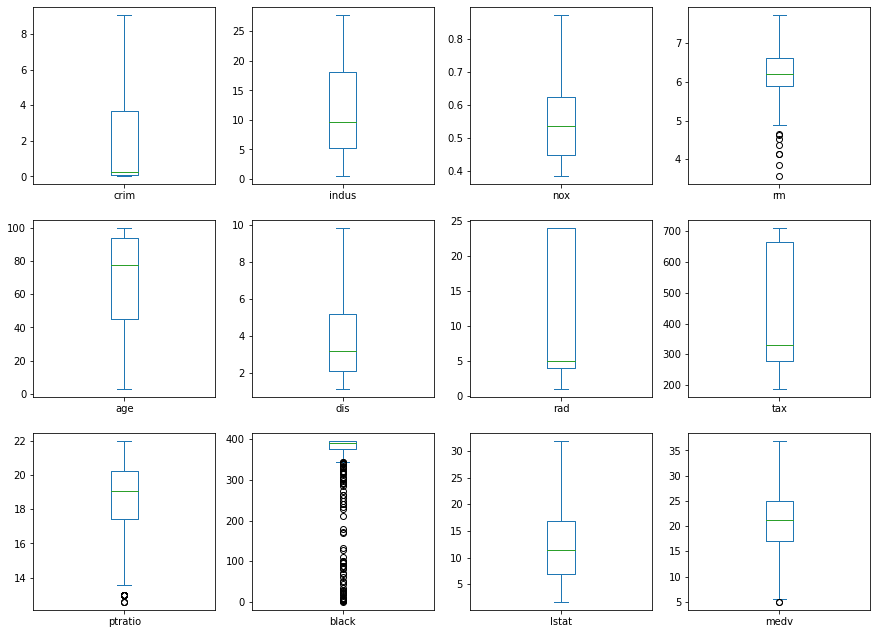

In [11]:
data["crim"]=outlier_treat(data["crim"])
data["rm"]=outlier_treat(data["rm"])
data["dis"]=outlier_treat(data["dis"])
data["ptratio"]=outlier_treat(data["ptratio"])
data["black"]=outlier_treat(data["black"])
data["lstat"]=outlier_treat(data["lstat"])
data["medv"]=outlier_treat(data["medv"])
outlier_detect(data)

From the above box plot we can see the function to capp the outliers, could not cap the outliers from black feature, so we have to remove the feature.

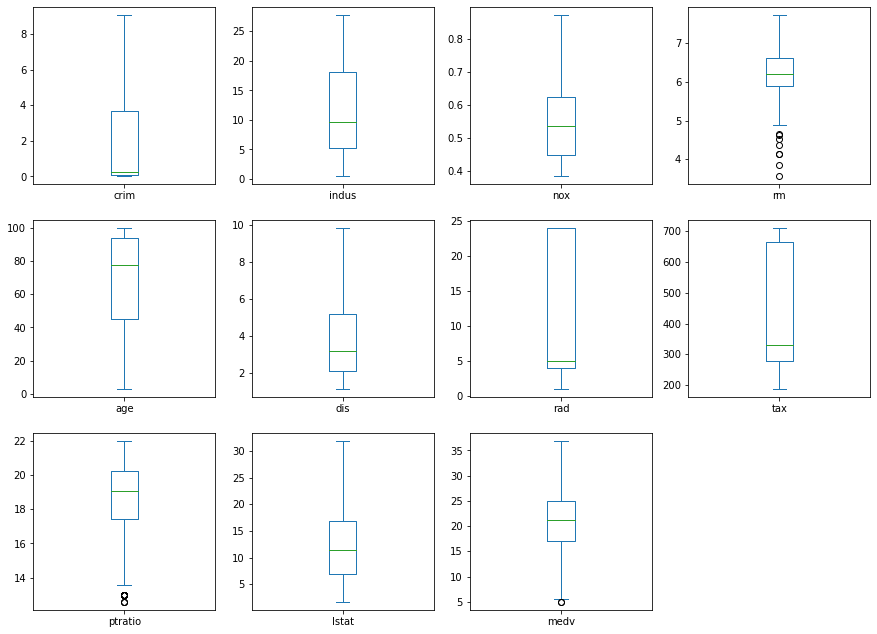

In [12]:
data=data.drop(["black"], axis=1)
outlier_detect(data)

Checking data shape and statistical details

In [13]:
data.shape

(506, 11)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,2.225032,3.313353,0.00632,0.082045,0.25651,3.677083,9.069639
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.740000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.871000
rm,506.0,6.266694,0.655550,3.56100,5.885500,6.20850,6.623500,7.730500
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.000000
dis,506.0,3.783947,2.069765,1.12960,2.100175,3.20745,5.188425,9.820800
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.000000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.000000
ptratio,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.000000
lstat,506.0,12.612011,7.016829,1.73000,6.950000,11.36000,16.955000,31.962500


Checking distribution pattern of target variable

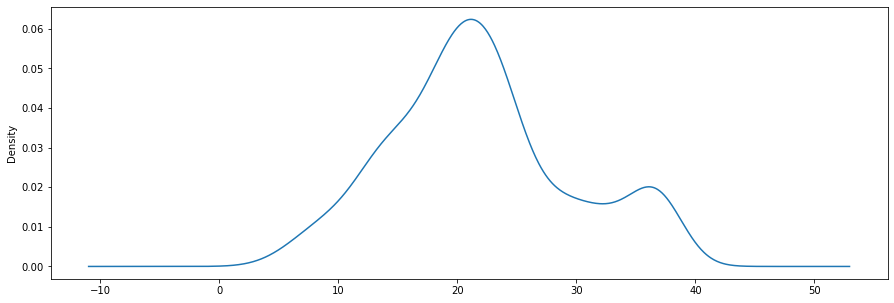

In [15]:
data['medv'].plot(kind='kde', figsize=(15,5));

We have slight right skewed distributed outcome with some outliers which may not affect the performance of the model.

#### Checking the correlation of each independent variable with out target variable

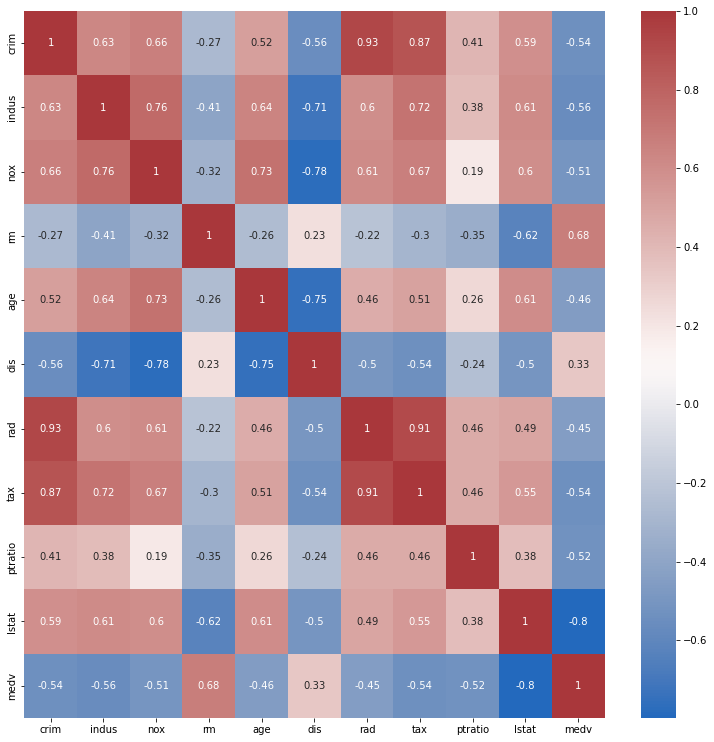

In [16]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='vlag');

From the correlation heatmap, we can say that, the output feature i.e. medv has strong correlation with "lstat","ptratio","rm","nox","indus","crim","tax".
So we have to consider histogram for all those correlated columns individually.

Text(0, 0.5, 'medv')

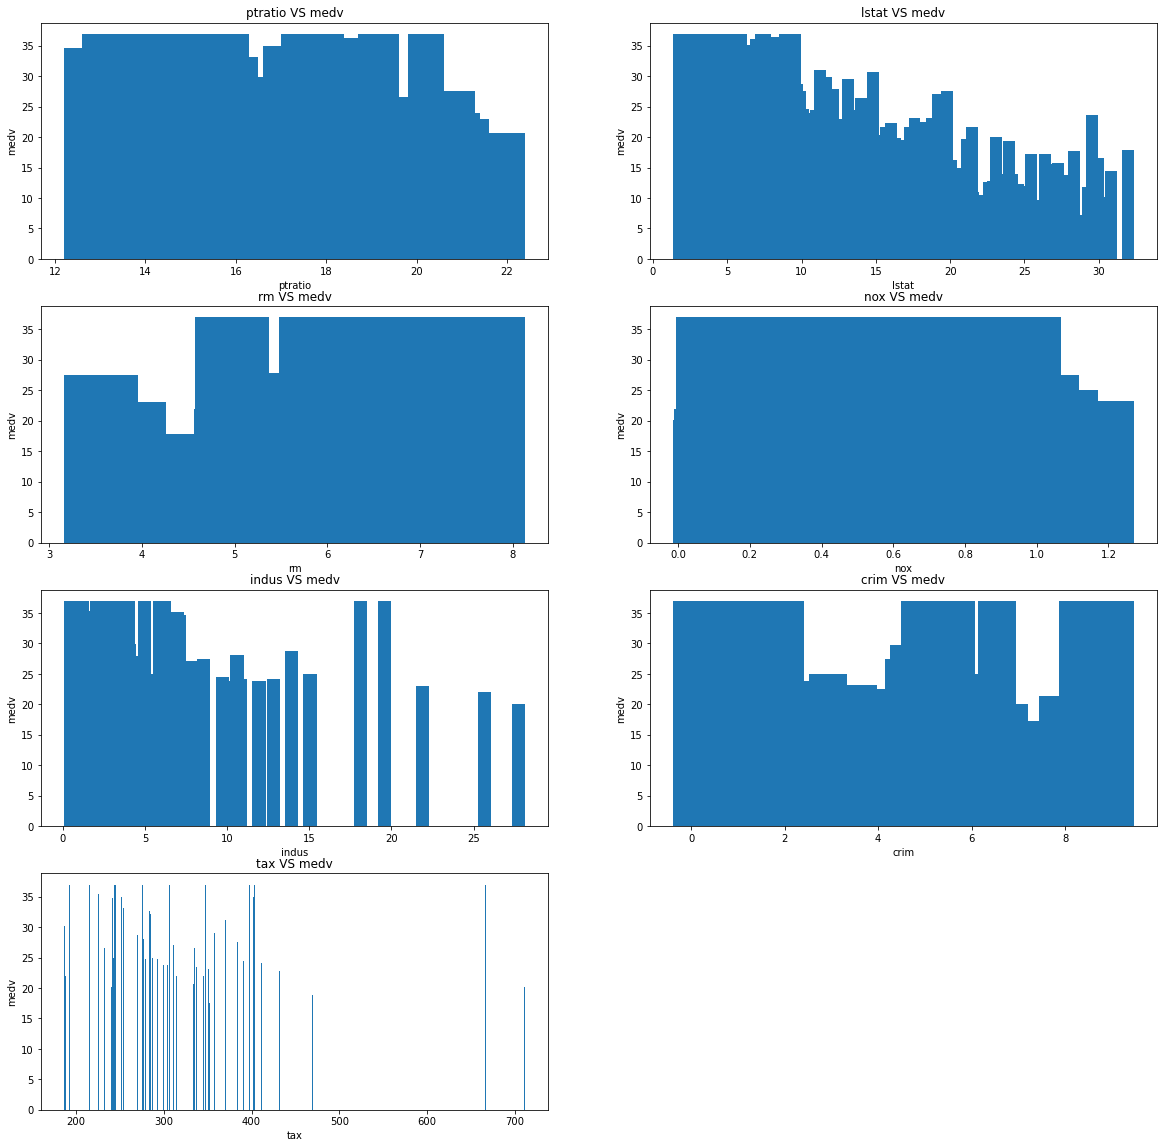

In [17]:
fig=plt.figure(figsize=(20,20))  

ax1=fig.add_subplot(4,2,1)   
ax2=fig.add_subplot(4,2,2)
ax3=fig.add_subplot(4,2,3)
ax4=fig.add_subplot(4,2,4)
ax5=fig.add_subplot(4,2,5)
ax6=fig.add_subplot(4,2,6)
ax7=fig.add_subplot(4,2,7)





ax1.bar(data.ptratio, data.medv)
ax1.set_title("ptratio VS medv")
ax1.set_xlabel("ptratio")
ax1.set_ylabel("medv")

ax2.bar(data.lstat, data.medv)
ax2.set_title("lstat VS medv")
ax2.set_xlabel("lstat")
ax2.set_ylabel("medv")

ax3.bar(data.rm, data.medv)
ax3.set_title("rm VS medv")
ax3.set_xlabel("rm")
ax3.set_ylabel("medv")

ax4.bar(data.nox, data.medv)
ax4.set_title("nox VS medv")
ax4.set_xlabel("nox")
ax4.set_ylabel("medv")

ax5.bar(data.indus, data.medv)
ax5.set_title("indus VS medv")
ax5.set_xlabel("indus")
ax5.set_ylabel("medv")

ax6.bar(data.crim, data.medv)
ax6.set_title("crim VS medv")
ax6.set_xlabel("crim")
ax6.set_ylabel("medv")

ax7.bar(data.tax, data.medv)
ax7.set_title("tax VS medv")
ax7.set_xlabel("tax")
ax7.set_ylabel("medv")



#### From above subplots, we can say,<br>
* ptratio is inversly proportional with medv<br>
* lstat is inversly proportional with medv<br>
* rm is directly proportional with medv<br>
* nox is inversly proportional with medv<br>
* indus is inversly proportional with medv<br>
* crim is inversly proportional with medv<br>
* tax is inversly proportional with medv<br>

In this stage we have cleaned almost the entire data set now we can proceed to fit into multiple regression models.

#### Splitting into dependent and independent features

In [18]:
X=data.drop(["medv"], axis=1)
Y=data["medv"]

In [19]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (506, 10)
Shape of Y: (506,)


#### Train Test Spliting

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, train_size=0.70)

In [22]:
print("Shape of X train:",x_train.shape)
print("Shape of Y train:",y_train.shape)
print("Shape of X test:",x_test.shape)
print("Shape of Y test:",y_test.shape)

Shape of X train: (354, 10)
Shape of Y train: (354,)
Shape of X test: (152, 10)
Shape of Y test: (152,)


#### Normalizing the data

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Regression model

Evaluate metrics

In [24]:
def model_evaluate(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MAE is {}'.format(round(mae, 3)))
    print('MSE is {}'.format(round(mse, 3)))
    print('R2 score is {}'.format(round(r2, 3)))
    

#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred=lr.predict(x_test_scaled)
print("Scores of Linear Regression:")
model_evaluate(y_test,y_pred)

Scores of Linear Regression:
MAE is 2.935
MSE is 15.924
R2 score is 0.718


#### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)
y_pred=dt.predict(x_test_scaled)
print("Scores of DT Regression:")
model_evaluate(y_test,y_pred)

Scores of DT Regression:
MAE is 2.66
MSE is 14.651
R2 score is 0.74


In [27]:
parameter={"max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
kf=KFold(n_splits=10)
grid_sv = GridSearchCV(dt, cv=kf, param_grid=parameter, scoring='neg_mean_absolute_error')
grid_sv.fit(x_train_scaled, y_train)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : DecisionTreeRegressor(max_depth=5)


Since for mean absolute error max depth=4
 and for mean square error max depth=6

In [28]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train_scaled, y_train)
y_pred=dt.predict(x_test_scaled)
print("Scores of DT Regression:")
model_evaluate(y_test,y_pred)

Scores of DT Regression:
MAE is 2.973
MSE is 16.19
R2 score is 0.713


#### KNN 

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train_scaled, y_train)
y_pred=knn.predict(x_test_scaled)
print("Scores of KNN Regression:")
model_evaluate(y_test,y_pred)

Scores of KNN Regression:
MAE is 2.387
MSE is 11.659
R2 score is 0.793


#### Gradient Boost

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(x_train_scaled, y_train)
y_pred=gbr.predict(x_test_scaled)
print("Scores of GB Regression:")
model_evaluate(y_test,y_pred)

Scores of GB Regression:
MAE is 2.249
MSE is 9.745
R2 score is 0.827


In [31]:
scores={"Linear regression":{"MAE":3.026, "MSE":18.209, "R2":0.672},
        "Decision Tree":{"MAE":2.98, "MSE":17.812, "R2":0.68},
        "Gredient Boost":{"MAE":2.18, "MSE":10.694, "R2":0.808},
        "KNN":{"MAE":2.489, "MSE":15.096, "R2":0.728}
       }

In [32]:
score_data = pd.DataFrame.from_dict(scores).T
score_data

,MAE,MSE,R2
Linear regression,3.026,18.209,0.672
Decision Tree,2.980,17.812,0.680
Gredient Boost,2.180,10.694,0.808
KNN,2.489,15.096,0.728


From the above data we can conclude that when we are using mean absolute error decision tree and KNN perform the same. When we take mean square error in calculation in that case also decision tree and KNN performs the same but in case of R square value Linear regression perform best.<br>
By considering all of the above scoring metrics value we can say that KNN is the best model for the given data set. 